In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Opening CSV

df = pd.read_csv("diabetes.csv")

In [4]:
#To check first five rows

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#To check number of rows and columns

df.shape

(768, 9)

In [30]:
#To check null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
#To check type of columns

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
#Seperating into two numpy arrays (dependendt and independent)

x = np.asarray(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
x[0:5]

array([[6.00e+00, 1.48e+02, 7.20e+01, 3.50e+01, 0.00e+00, 3.36e+01,
        6.27e-01, 5.00e+01],
       [1.00e+00, 8.50e+01, 6.60e+01, 2.90e+01, 0.00e+00, 2.66e+01,
        3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, 0.00e+00, 0.00e+00, 2.33e+01,
        6.72e-01, 3.20e+01],
       [1.00e+00, 8.90e+01, 6.60e+01, 2.30e+01, 9.40e+01, 2.81e+01,
        1.67e-01, 2.10e+01],
       [0.00e+00, 1.37e+02, 4.00e+01, 3.50e+01, 1.68e+02, 4.31e+01,
        2.29e+00, 3.30e+01]])

In [33]:
y = np.asarray(df['Outcome'])
y[0:5]

array([1, 0, 1, 0, 1])

In [34]:
#Normalizing the data

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.64,  0.85,  0.15,  0.91, -0.69,  0.2 ,  0.47,  1.43],
       [-0.84, -1.12, -0.16,  0.53, -0.69, -0.68, -0.37, -0.19],
       [ 1.23,  1.94, -0.26, -1.29, -0.69, -1.1 ,  0.6 , -0.11],
       [-0.84, -1.  , -0.16,  0.15,  0.12, -0.49, -0.92, -1.04],
       [-1.14,  0.5 , -1.5 ,  0.91,  0.77,  1.41,  5.48, -0.02]])

In [35]:
#Splitting data into trainin and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 23)

In [36]:
#Fitting data using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [37]:
#Predicting values on the test dataset

yhat = LR.predict(x_test)
yhat

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [38]:
#Checkign accuracy of the model on the test data using jaccard score

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7191011235955056

In [39]:
#Plotting confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 53  30]
 [ 20 128]]


Confusion matrix, without normalization
[[ 53  30]
 [ 20 128]]


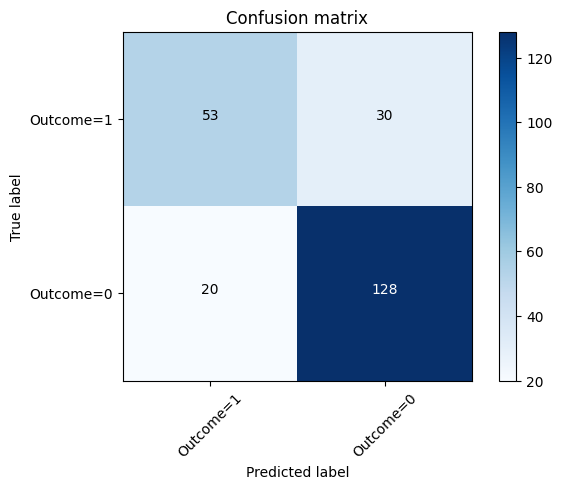

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Outcome=1','Outcome=0'],normalize= False,  title='Confusion matrix')